In [1]:
from google.colab import files
uploaded = files.upload()

Saving 6. Predict Employee Attrition.csv to 6. Predict Employee Attrition.csv


Accuracy: 84.01%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.68      0.55      0.56       294
weighted avg       0.80      0.84      0.80       294



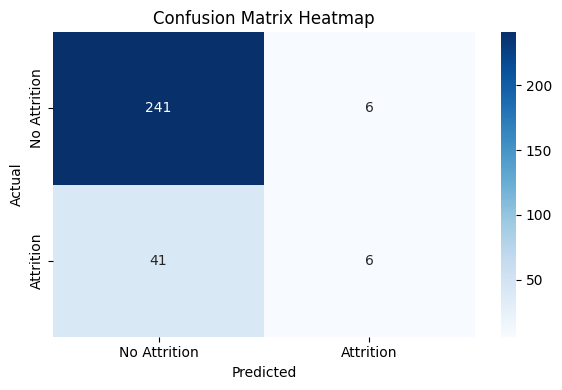

In [13]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 1: Load the dataset (Download from Kaggle:
# https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
df = pd.read_csv('6. Predict Employee Attrition.csv')

# Step 2: Drop unnecessary columns
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

# Step 3: Encode categorical features
# Encode target variable first
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
# Encode other categorical columns using LabelEncoder
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Step 4: Prepare features and labels
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 6: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Generate and display the confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()
